In [2]:
from sklearn.datasets import fetch_openml
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from models import *
from sklearn import svm
from tqdm.notebook import tqdm
import time

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = False)
y = y.astype(np.int)

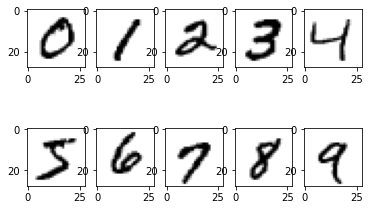

In [4]:
showMnistExamples(X, y, 0)

# Logistic Regression

In [4]:
model = LogisticRegression(penalty='l1', solver='saga', max_iter=100, tol=1)
mc = MNISTClassifier(model, X, y)

In [5]:
print(mc.modelScore)

0.9113714285714286


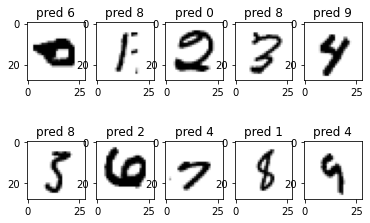

In [6]:
mc.showWrongOnes(2)

In [8]:
scores = mc.getCrossValidateScore()
print("%0.2f accuracy with a standard deviation of %0.8f" % (scores.mean(), scores.std()))


0.91 accuracy with a standard deviation of 0.00490868


In [8]:
print(y[:100])

[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9 4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6
 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6
 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6 8 0 7 8 3 1]


In [13]:
Cs = [1e1,7,5,3,1]
kernels = ["poly", 'rbf']
scmax = 0
best_kernel = ""
bestC = 0
with tqdm(total=100) as pbar:
    for C in Cs:
        for kernel in kernels:
            model = svm.SVC(C=C, kernel=kernel, tol=1)
            mcf = MNISTClassifier(model, X[:5000], y[:5000], fitting=False)
            sc = mcf.getCrossValidateScore().mean()
            if sc > scmax:
                scmax = sc
                best_kernel = kernel
                bestC = C    
            pbar.update(100 / (len(Cs) * len(kernels)))

print(f'score for {scmax} {bestC} {best_kernel}')


score for 0.9536 5 rbf


In [19]:
model = svm.SVC(C=bestC, kernel=best_kernel, tol=1)
mcf = MNISTClassifier(model, X[:5000], y[:5000])
print(mcf.predictions)

[9 4 6 ... 5 6 7]
